In [204]:
import pandas as pd 
import matplotlib.pyplot as plt

In [205]:
#Load the dataset into a Pandas DataFrame
df = pd.read_csv("indian_food(in).csv")

#Show first 5 rows
print(df.head(20))

    food_id            name  \
0         1      Balu shahi   
1         2          Boondi   
2         3  Gajar ka halwa   
3         4          Ghevar   
4         5     Gulab jamun   
5         6          Imarti   
6         7          Jalebi   
7         8      Kaju katli   
8         9        Kalakand   
9        10           Kheer   
10       11           Laddu   
11       12           Lassi   
12       13       Nankhatai   
13       14           Petha   
14       15          Phirni   
15       16           Rabri   
16       17          Sheera   
17       18         Singori   
18       19     Sohan halwa   
19       20     Sohan papdi   

                                          ingredients        diet  prep_time  \
0                     Maida flour, yogurt, oil, sugar  vegetarian       45.0   
1                             Gram flour, ghee, sugar  vegetarian       80.0   
2        Carrots, milk, sugar, ghee, cashews, raisins  vegetarian       15.0   
3   Flour, ghee, kewra, milk

In [206]:
#Show last 5 rows
print(df.tail(10))

     food_id               name  \
245      246         Pani Pitha   
246      247             Payokh   
247      248  Prawn malai curry   
248      249           Red Rice   
249      250             Shukto   
250      251          Til Pitha   
251      252            Bebinca   
252      253             Shufta   
253      254          Mawa Bati   
254      255             Pinaca   

                                           ingredients            diet  \
245  Tea leaves, white sesame seeds, dry coconut, s...      vegetarian   
246  Basmati rice, rose water, sugar, clarified but...      vegetarian   
247      Coconut milk, prawns, garlic, turmeric, sugar  non vegetarian   
248  Red pepper, red onion, butter, watercress, oli...      vegetarian   
249  Green beans, bitter gourd, ridge gourd, banana...      vegetarian   
250            Glutinous rice, black sesame seeds, gur      vegetarian   
251  Coconut milk, egg yolks, clarified butter, all...      vegetarian   
252  Cottage cheese, d

In [207]:
#Number of Row and Columns
print(df.info)

<bound method DataFrame.info of      food_id            name  \
0          1      Balu shahi   
1          2          Boondi   
2          3  Gajar ka halwa   
3          4          Ghevar   
4          5     Gulab jamun   
..       ...             ...   
250      251       Til Pitha   
251      252         Bebinca   
252      253          Shufta   
253      254       Mawa Bati   
254      255          Pinaca   

                                           ingredients        diet  prep_time  \
0                      Maida flour, yogurt, oil, sugar  vegetarian       45.0   
1                              Gram flour, ghee, sugar  vegetarian       80.0   
2         Carrots, milk, sugar, ghee, cashews, raisins  vegetarian       15.0   
3    Flour, ghee, kewra, milk, clarified butter, su...  vegetarian       15.0   
4    Milk powder, plain flour, baking powder, ghee,...  vegetarian       15.0   
..                                                 ...         ...        ...   
250            G

In [208]:
# Cheak data types in Pandas 
print(df.dtypes)

food_id             int64
name               object
ingredients        object
diet               object
prep_time         float64
cook_time           int64
flavor_profile     object
course             object
state              object
region             object
dtype: object


In [209]:
x1 = df.columns[df.isnull().any()].tolist()
# print(df.tail(10))
print(x1)
print(df.isnull().sum())

['prep_time', 'state', 'region']
food_id           0
name              0
ingredients       0
diet              0
prep_time         4
cook_time         0
flavor_profile    0
course            0
state             9
region            1
dtype: int64


In [210]:
df =df.replace("", pd.NA)
# print(df.tail(10))
print("---------")
df = df.replace(-1, pd.NA)
df = df.replace("-1", pd.NA)

---------


In [211]:
x1 = df.columns[df.isnull().any()].tolist()
# print(df.tail(10))
print(x1)
print(df.isnull().sum())


['prep_time', 'cook_time', 'flavor_profile', 'state', 'region']
food_id            0
name               0
ingredients        0
diet               0
prep_time         32
cook_time         28
flavor_profile    29
course             0
state             33
region            14
dtype: int64


In [212]:

# df = df.fillna({
#     "prep_time": 0,
#     "cook_time": 0,
#     "state": "Unknown",
#     "region": "Unknown",
#     "diet": "Unknown",
#     "flavor_profile": "Unknown"
# })


flavor_test  = ["flavor_profile"]

spicy_ing = df[df["flavor_profile"] == "spicy"]["ingredients"].tolist()
sweet_ing = df[df["flavor_profile"] == "sweet"]["ingredients"].tolist()
bitter_ing = df[df["flavor_profile"] == "bitter"]["ingredients"].tolist()
sour_ing = df[df["flavor_profile"] == "sour"]["ingredients"].tolist()

# print(spicy_ids)

new_spicy_ing = []
for i in spicy_ing :
    for j in [sweet_ing,bitter_ing,sour_ing]  :
        if i not in j :
            new_spicy_ing.append(i)


new_sweet_ing = []
for i in sweet_ing :
    for j in [spicy_ing,bitter_ing,sour_ing] :
        if i not in j :
            new_sweet_ing.append(i)

        
new_bitter_ing = []           
for i in bitter_ing :
    for j in [sweet_ing,spicy_ing,sour_ing]  :
        if i not in j :
            new_bitter_ing.append(i)

            
new_sour_ing = []
for i in sour_ing :
    for j in [sweet_ing,bitter_ing,spicy_ing]  :
        if i not in j :
            new_sour_ing.append(i)
            
            
# print(list(set(new_spicy_ing))) 
# print("---------4")
# print(list(set(new_sweet_ing)))
# print("---------3")
# print(list(set(new_bitter_ing)))
# print("---------2")
# print(list(set(new_sour_ing)))
# print("---------1")

df = df.fillna({
    "prep_time": df['prep_time'].mean(),
    "cook_time": df['cook_time'].mean(),
    "state": "U1",
    "region": "U2",
    "diet": "U3",
    "flavor_profile": "U4"
})

flavor_p = df[df["flavor_profile"] == "U4"]["ingredients"].tolist() 
non_veg_items = [
    "chicken", "mutton", "fish", "pork", "egg", 
    "beef", "prawns", "shrimp", "crab", "shellfish",
    "lamb", "bacon", "ham", "duck", "turkey"
]
dit_p = df[df["diet"] == "U3"]["ingredients"].tolist() 

x1 = ""
for i in flavor_p :
    if i in new_sour_ing :
        x1 += "sour"
        break
    elif i in new_bitter_ing :
        x1 += "bitter"
        break
    elif i in new_sweet_ing :
        x1 += "sweet"
        break
    else:
        x1 += "spicy"
        break
# print(flavor_p)
# print("-------")
print(x1)
# print("-------")
df =df.replace("U4", x1)

if dit_p in non_veg_items :
    df =df.replace("U3", "non vegetarian")
else :
    df =df.replace("U3", "vegetarian")
# print(flavor_p)

df = df.infer_objects(copy=False)
print(df.tail(10))

spicy
     food_id               name  \
245      246         Pani Pitha   
246      247             Payokh   
247      248  Prawn malai curry   
248      249           Red Rice   
249      250             Shukto   
250      251          Til Pitha   
251      252            Bebinca   
252      253             Shufta   
253      254          Mawa Bati   
254      255             Pinaca   

                                           ingredients            diet  \
245  Tea leaves, white sesame seeds, dry coconut, s...      vegetarian   
246  Basmati rice, rose water, sugar, clarified but...      vegetarian   
247      Coconut milk, prawns, garlic, turmeric, sugar  non vegetarian   
248  Red pepper, red onion, butter, watercress, oli...      vegetarian   
249  Green beans, bitter gourd, ridge gourd, banana...      vegetarian   
250            Glutinous rice, black sesame seeds, gur      vegetarian   
251  Coconut milk, egg yolks, clarified butter, all...      vegetarian   
252  Cottage che

/var/folders/sy/m7k6mw5s73vb6glpqkq98gyr0000gn/T/ipykernel_3180/3498844111.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna({


In [213]:
# List of categorical columns to explore

# Unique Value Exploration

# For each categorical column:

# List all unique values

# Count how many items belong to each category

# Columns:

# diet

# flavor_profile

# course

# state

# region


categorical_columns = ['ingredients','diet', 'flavor_profile', 'course', 'state', 'region']

print("Unique Value Exploration for Categorical Columns:\n")

for col in categorical_columns:
    print("-----------")
    print(f"Column: '{col}'")
    

    # List all unique values
    unique_values = df[col].unique()
    print(f"  Unique values: {unique_values}")

    # Count how many items belong to each category
    category_counts = df[col].value_counts()
    print(f"  Category counts:\n{category_counts}\n")
    print("-----------")
    

Unique Value Exploration for Categorical Columns:

-----------
Column: 'ingredients'
  Unique values: ['Maida flour, yogurt, oil, sugar' 'Gram flour, ghee, sugar'
 'Carrots, milk, sugar, ghee, cashews, raisins'
 'Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom'
 'Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water'
 'Sugar syrup, lentil flour'
 'Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom'
 'Cashews, ghee, cardamom, sugar' 'Milk, cottage cheese, sugar'
 'Milk, rice, sugar, dried fruits' 'Yogurt, milk, nuts, sugar'
 'Refined flour, besan, ghee, powdered sugar, yoghurt, green cardamom'
 'Firm white pumpkin, sugar, kitchen lime, alum powder'
 'Rice, sugar, nuts' 'Condensed milk, sugar, spices, nuts'
 'Semolina, ghee, nuts, milk' 'Khoa, coconut, molu leaf'
 'Corn flour, ghee, dry fruits' 'Gram flour, ghee, sugar, milk, cardamom'
 'Chhena, sugar, ghee' 'Chhena, sugar, milk' 'Sugar,

In [214]:
# Numerical Analysis

# On prep_time and cook_time:

# Calculate minimum

# Maximum

# Mean

# Median

# Standard deviation


print("--- Prep Time Statistics ---")
print(f"Minimum prep_time: {df['prep_time'].min()}")
print(f"Maximum prep_time: {df['prep_time'].max()}")
print(f"Mean prep_time: {df['prep_time'].mean()}")
print(f"Median prep_time: {df['prep_time'].median()}")
print(f"Standard Deviation of prep_time: {df['prep_time'].std()}")
print("\n--- Cook Time Statistics ---")

print(f"Minimum cook_time: {df['cook_time'].min()}")
print(f"Maximum cook_time: {df['cook_time'].max()}")
print(f"Mean cook_time: {df['cook_time'].mean()}")
print(f"Median cook_time: {df['cook_time'].median()}")
print(f"Standard Deviation of cook_time: {df['cook_time'].std()}")

--- Prep Time Statistics ---
Minimum prep_time: 5.0
Maximum prep_time: 500.0
Mean prep_time: 35.63677130044843
Median prep_time: 15.0
Standard Deviation of prep_time: 71.55372351127573

--- Cook Time Statistics ---
Minimum cook_time: 2.0
Maximum cook_time: 720.0
Mean cook_time: 38.91189427312775
Median cook_time: 30.0
Standard Deviation of cook_time: 46.618160678654796


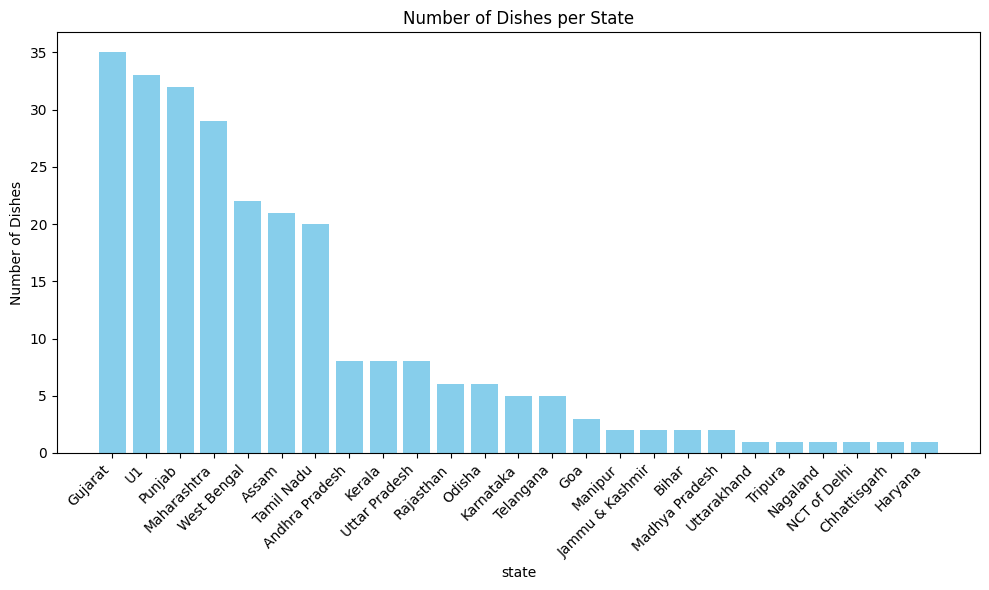

In [215]:
dishes_per_state = df['state'].value_counts()
dishes_per_region = df['region'].value_counts()
dishes_per_flavor_profile = df['flavor_profile'].value_counts()

plt.figure(figsize=(10, 6)) 
plt.bar(dishes_per_state.index, dishes_per_state.values, color='skyblue')
plt.xlabel('state')
plt.ylabel('Number of Dishes')
plt.title('Number of Dishes per State')
plt.xticks(rotation=45, ha='right') #
plt.tight_layout() 
plt.show()

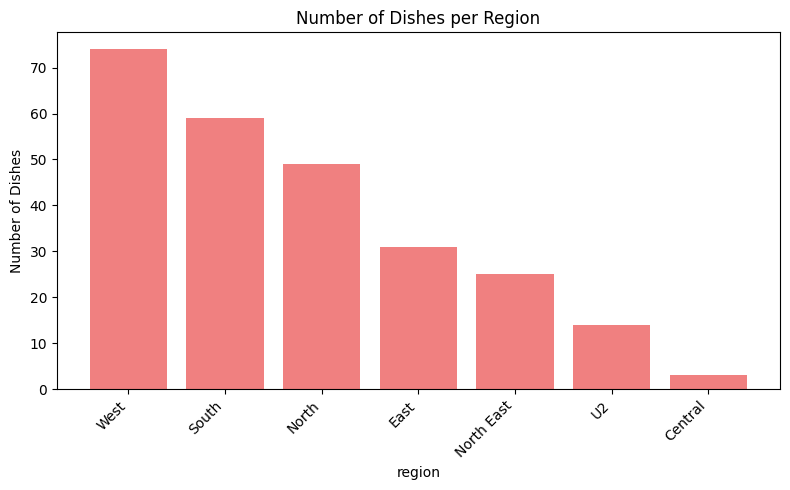

In [216]:
plt.figure(figsize=(8, 5))
plt.bar(dishes_per_region.index, dishes_per_region.values, color='lightcoral')
plt.xlabel('region')
plt.ylabel('Number of Dishes')
plt.title('Number of Dishes per Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

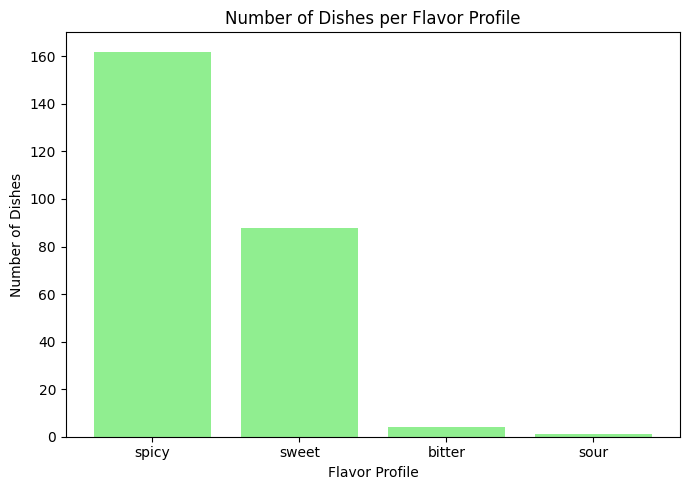

In [217]:
plt.figure(figsize=(7, 5))
plt.bar(dishes_per_flavor_profile.index, dishes_per_flavor_profile.values, color='lightgreen')
plt.xlabel('Flavor Profile')
plt.ylabel('Number of Dishes')
plt.title('Number of Dishes per Flavor Profile')
plt.tight_layout()
plt.show()

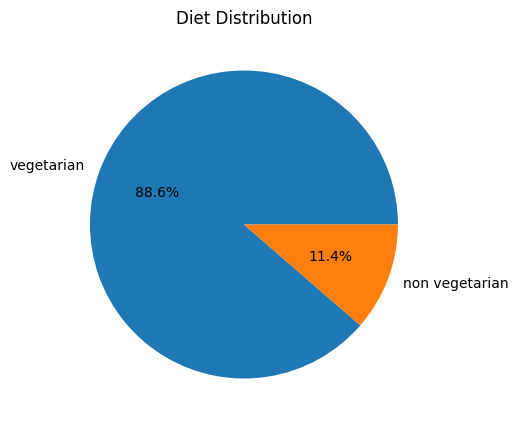

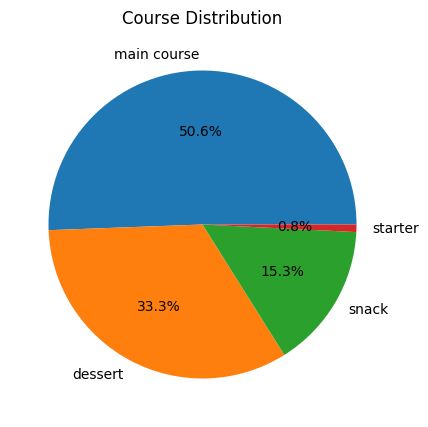

In [218]:
# Pie Charts

# Create pie charts for:

# diet distribution

df['diet'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Diet Distribution")
plt.ylabel('')
plt.show()

# course distribution

df['course'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Course Distribution")
plt.ylabel('')
plt.show()

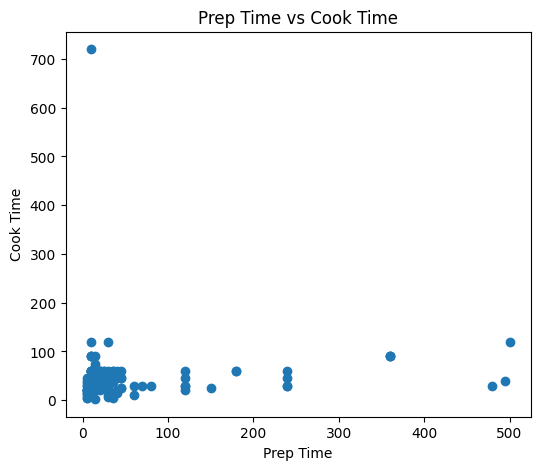

In [219]:
#Scatter Plot (prep_time vs cook_time)
plt.figure(figsize=(6,5))
plt.scatter(df['prep_time'], df['cook_time'])
plt.xlabel("Prep Time")
plt.ylabel("Cook Time")
plt.title("Prep Time vs Cook Time")
plt.show()


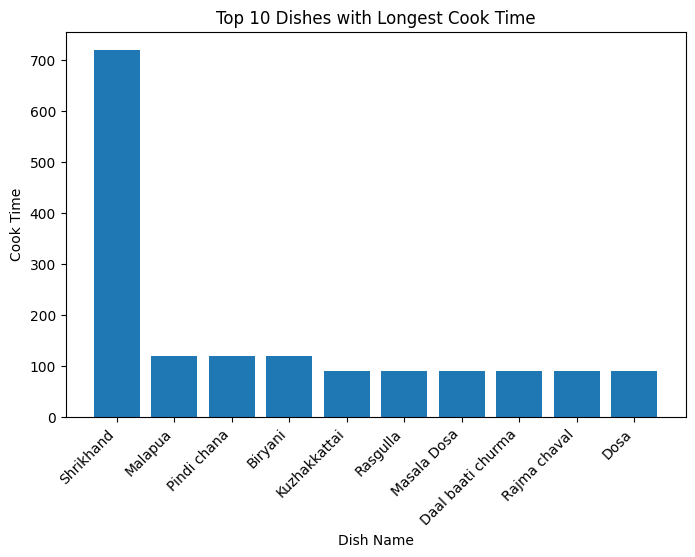

In [220]:
#Top 10 Longest Cook Time Dishes
top10 = df.sort_values(by='cook_time', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.bar(top10['name'], top10['cook_time'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Dish Name")
plt.ylabel("Cook Time")
plt.title("Top 10 Dishes with Longest Cook Time")
plt.show()


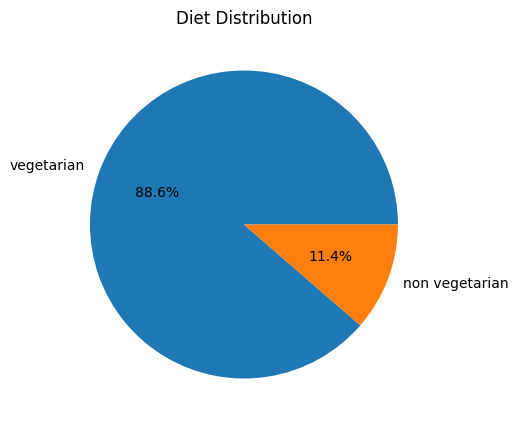

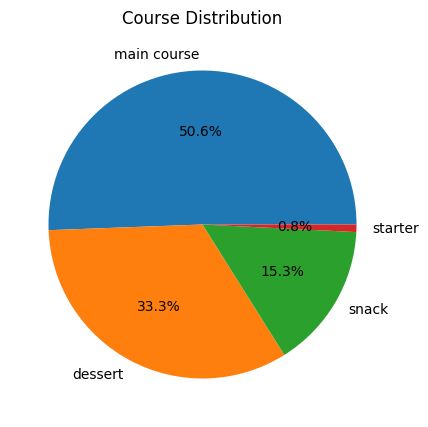

In [221]:
#Pie Charts — Diet & Course Distribution
# Pie chart: diet distribution
df['diet'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Diet Distribution")
plt.ylabel("")
plt.show()

# Pie chart: course distribution
df['course'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Course Distribution")
plt.ylabel("")
plt.show()

In [222]:
#Detect Duplicates
# Duplicate food_id
dup_id = df[df.duplicated('food_id', keep=False)]
print("Duplicate food_id rows:")
print(dup_id)

# Duplicate names
dup_name = df[df.duplicated('name', keep=False)]
print("Duplicate names:")
print(dup_name)

Duplicate food_id rows:
Empty DataFrame
Columns: [food_id, name, ingredients, diet, prep_time, cook_time, flavor_profile, course, state, region]
Index: []
Duplicate names:
Empty DataFrame
Columns: [food_id, name, ingredients, diet, prep_time, cook_time, flavor_profile, course, state, region]
Index: []


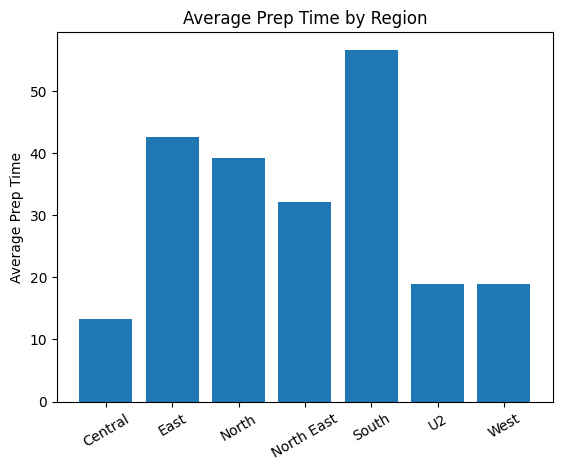

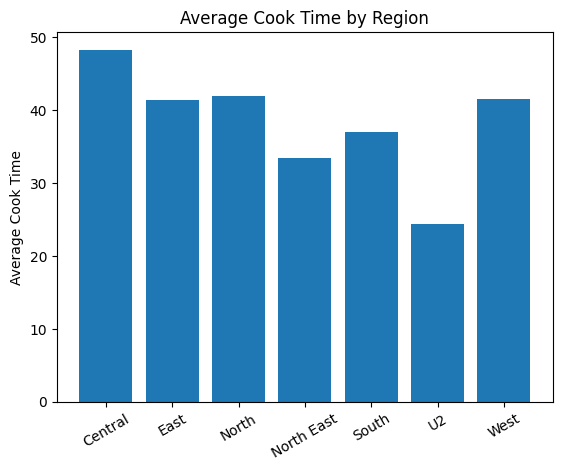

In [223]:
#Compare Regions (Bar Charts for Prep & Cook Time)
region_avg = df.groupby('region')[['prep_time', 'cook_time']].mean()

# Prep time comparison
plt.bar(region_avg.index, region_avg['prep_time'])
plt.title("Average Prep Time by Region")
plt.xticks(rotation=30)
plt.ylabel("Average Prep Time")
plt.show()

# Cook time comparison
plt.bar(region_avg.index, region_avg['cook_time'])
plt.title("Average Cook Time by Region")
plt.xticks(rotation=30)
plt.ylabel("Average Cook Time")
plt.show()